# 1 产生数据集|

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# 设置随机数种子，确保固定方式的随机数
np.random.seed(5)
#直接采用np生成等差数列，生成100个点，每个点在-1到1之间
x_data=np.linspace(-1,1,100)
# 生成y=2x+1+噪声,噪声维度和x_data一致
y_data=2*x_data+1.0+np.random.randn(*x_data.shape)*0.4

In [2]:
np.random.randn(10)

array([ 0.79242262,  0.17076445, -1.75374086,  0.63029648,  0.49832921,
        1.01813761, -0.84646862,  2.52080763, -1.23238611,  0.72695326])

In [3]:
x_data.shape

(100,)

# 2利用matplotlib画出结果

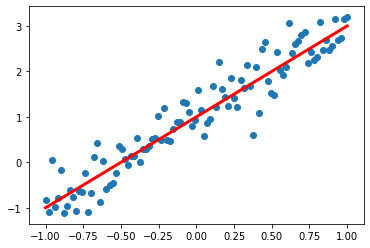

In [4]:
# 画出随机散点图
plt.scatter(x_data,y_data)
# 画出我们想要学习的线性函数y=2x+1
plt.plot(x_data,2*x_data+1,color='red',linewidth=3)

In [5]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

# 3 构造模型

In [6]:
#定义占位符，x是特征值，y是标签
x=tf.placeholder("float",name = "x")
y=tf.placeholder("float",name= "y")

构造回归模型

In [7]:
def model(x,w,b):
    return tf.multiply(x,w)+b

创建变量

In [8]:
w=tf.Variable(1.0,name="w0")
b=tf.Variable(0.0,name="b0")

In [9]:
pred=model(x,w,b)

In [10]:
train_epcohs=10

In [11]:
learning_rate=0.05

In [12]:
loss_function=tf.reduce_mean(tf.square(y-pred))

In [13]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

In [14]:
sess=tf.Session()

In [15]:
init=tf.global_variables_initializer()  
sess.run(init)

1.1141459 1.8249046
1.9090568 1.1080607
1.9761181 1.0475844
1.9817748 1.042483
1.9822522 1.0420525
1.9822925 1.0420163
1.982296 1.0420133
1.9822965 1.0420128
1.9822965 1.0420128
1.9822965 1.0420128


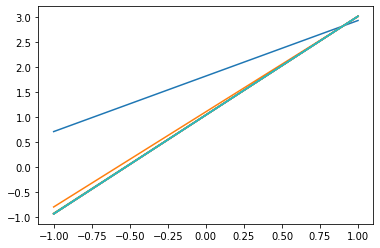

In [16]:
for epoch in range(train_epcohs):
    for xs ,ys in zip (x_data,y_data):
        _,loss=sess.run([optimizer,loss_function],feed_dict={x:xs,y:ys})
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    print(w0temp,b0temp)
    plt.plot(x_data,w0temp*x_data+b0temp)

In [17]:
print("w:",sess.run(w))
print("b:",sess.run(b))

w: 1.9822965
b: 1.0420128


# 可视化

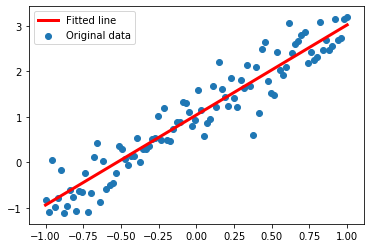

In [18]:
plt.scatter(x_data,y_data,label='Original data')
plt.plot(x_data,x_data*sess.run(w)+sess.run(b),label="Fitted line"  ,color='r',linewidth=3)
plt.legend(loc=2)

optimizer尝试

In [20]:
x_test=3.21
predit=sess.run(pred,feed_dict={x:x_test})
print("预测值:%f"%predit)
target=2*x_test+1
print("目标值：%f"%target)

预测值:7.405184
目标值：7.420000
